-- Importo la librería de pandas, numpy y matoplotlib (imagenes)

In [17]:
import pandas as pd

Descargo los csv en formato pandas, para análisis de datos

In [18]:
dfAmazon = pd.read_csv('datasets/amazon_prime_titles.csv', encoding = 'utf-8')
dfDisney = pd.read_csv('datasets/disney_plus_titles.csv', encoding='utf-8')
dfHuluTitles = pd.read_csv('datasets/hulu_titles.csv', encoding='utf-8')
dfNetflix = pd.read_csv('datasets/netflix_titles.csv', encoding='utf-8')

**TRATAMIENTO DE DATOS**

*Evaluacion de nulos por dataframe*

In [20]:
dfAmazon.isnull().sum()
#dfAmazon.shape

show_id            0
type               0
title              0
director        2083
cast            1233
country         8996
date_added      9513
release_year       0
rating           337
duration           0
listed_in          0
description        0
dtype: int64

In [21]:
dfDisney.isnull().sum()
#dfDisney.shape

show_id           0
type              0
title             0
director        473
cast            190
country         219
date_added        3
release_year      0
rating            3
duration          0
listed_in         0
description       0
dtype: int64

In [22]:
dfHuluTitles.isnull().sum()
#dfHuluTitles.shape

show_id            0
type               0
title              0
director        3070
cast            3073
country         1453
date_added        28
release_year       0
rating           520
duration         479
listed_in          0
description        4
dtype: int64

In [23]:
dfNetflix.isnull().sum()
#dfNetflix.shape

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

----

Agregamos la primera letra de la plataforma a cada uno de los ID de la columna *show_id*

In [24]:
string_agregar='a'
dfAmazon['show_id']=dfAmazon['show_id'].apply(lambda x: string_agregar + x) #aplicamos una funcion lambda dentro de un aplly 
                                                                            #por sobre toda la columnas
string_agregar='d'
dfDisney['show_id']=dfDisney['show_id'].apply(lambda x: string_agregar + x)

string_agregar='h'
dfHuluTitles['show_id']=dfHuluTitles['show_id'].apply(lambda x: string_agregar + x)

string_agregar='n'
dfNetflix['show_id']=dfNetflix['show_id'].apply(lambda x: string_agregar + x)

---

Todos los valores nulos de la columna *rating* se les agrega el string *G* como apto para todas las audiencias

In [25]:
value='g'
dfAmazon['rating']=dfAmazon['rating'].fillna(value)
#dfAmazon['rating'].unique()

value='g'
dfDisney['rating']=dfDisney['rating'].fillna(value)

value='g'
dfHuluTitles['rating']=dfHuluTitles['rating'].fillna(value)

value='g'
dfNetflix['rating']=dfNetflix['rating'].fillna(value)

---

Todos los strings se pasan a *minuscula*

In [26]:
dfAmazon = dfAmazon.applymap(lambda x: x.lower() if isinstance(x, str) else x)  #aplicamos una funcion lambda dentro de un applymap 
                                                                                #para pueda diferenciar entre str e int
dfDisney = dfDisney.applymap(lambda x: x.lower() if isinstance(x, str) else x)

dfHuluTitles = dfHuluTitles.applymap(lambda x: x.lower() if isinstance(x, str) else x)

dfNetflix = dfNetflix.applymap(lambda x: x.lower() if isinstance(x, str) else x)

---

Dividimos el camp *duration* en dos **(duration_int y duration_type)**, el primero será un integer y el segundo un string indicando la unidad de medición de duración: min (minutos) o season (temporadas)

In [27]:
dfAmazon.loc[dfAmazon['type'] == 'movie', 'duration_int'] = dfAmazon['duration'].str.split(' ').str[0]
dfAmazon.loc[dfAmazon['type'] == 'tv show', 'duration_int'] = dfAmazon['duration'].str.split(' ').str[0]
dfAmazon.loc[dfAmazon['type']=='movie','duration_type']='min'
dfAmazon.loc[dfAmazon['type']=='tv show','duration_type']='season'
dfAmazon['duration_int'] = dfAmazon['duration_int'].fillna(0)
dfAmazon['duration_int'] = dfAmazon['duration_int'].astype(int)

dfDisney.loc[dfDisney['type'] == 'movie', 'duration_int'] = dfDisney['duration'].str.split(' ').str[0]
dfDisney.loc[dfDisney['type'] == 'tv show', 'duration_int'] = dfDisney['duration'].str.split(' ').str[0]
dfDisney.loc[dfDisney['type']=='movie','duration_type']='min'
dfDisney.loc[dfDisney['type']=='tv show','duration_type']='season'
dfDisney['duration_int'] = dfDisney['duration_int'].fillna(0)
dfDisney['duration_int'] = dfDisney['duration_int'].astype(int)

dfHuluTitles.loc[dfHuluTitles['type'] == 'movie', 'duration_int'] = dfHuluTitles['duration'].str.split(' ').str[0]
dfHuluTitles.loc[dfHuluTitles['type'] == 'tv show', 'duration_int'] = dfHuluTitles['duration'].str.split(' ').str[0]
dfHuluTitles.loc[dfHuluTitles['type']=='movie','duration_type']='min'
dfHuluTitles.loc[dfHuluTitles['type']=='tv show','duration_type']='season'
dfHuluTitles['duration_int'] = dfHuluTitles['duration_int'].fillna(0)
dfHuluTitles['duration_int'] = dfHuluTitles['duration_int'].astype(int)

dfNetflix.loc[dfNetflix['type'] == 'movie', 'duration_int'] = dfNetflix['duration'].str.split(' ').str[0]
dfNetflix.loc[dfNetflix['type'] == 'tv show', 'duration_int'] = dfNetflix['duration'].str.split(' ').str[0]
dfNetflix.loc[dfNetflix['type']=='movie','duration_type']='min'
dfNetflix.loc[dfNetflix['type']=='tv show','duration_type']='season'
dfNetflix['duration_int'] = dfNetflix['duration_int'].fillna(0)
dfNetflix['duration_int'] = dfNetflix['duration_int'].astype(int)

Quitamos *duration* y reordenamos las columnas

In [28]:
dfAmazon = dfAmazon.drop(columns = ['duration'])

dfDisney = dfDisney.drop(columns = ['duration'])

dfHuluTitles = dfHuluTitles.drop(columns = ['duration'])

dfNetflix = dfNetflix.drop(columns = ['duration'])

In [29]:
dfAmazon = dfAmazon.reindex(columns=['show_id','type','title','director','cast','country','release_year','rating','duration_int','duration_type','listed_in'])

dfDisney = dfDisney.reindex(columns=['show_id','type','title','director','cast','country','release_year','rating','duration_int','duration_type','listed_in'])

dfHuluTitles = dfHuluTitles.reindex(columns=['show_id','type','title','director','cast','country','release_year','rating','duration_int','duration_type','listed_in'])

dfNetflix = dfNetflix.reindex(columns=['show_id','type','title','director','cast','country','release_year','rating','duration_int','duration_type','listed_in'])

---

Quitar columnas que no van a ser relevantes

In [ ]:
dfAmazon = dfAmazon.drop(columns = ['date_added'])
dfAmazon = dfAmazon.drop(columns = ['description'])

dfDisney = dfDisney.drop(columns = ['date_added'])
dfDisney = dfDisney.drop(columns = ['description'])

dfHuluTitles = dfHuluTitles.drop(columns = ['date_added'])
dfHuluTitles = dfHuluTitles.drop(columns = ['description'])

dfNetflix = dfNetflix.drop(columns = ['date_added'])
dfNetflix = dfNetflix.drop(columns = ['description'])

---

Calculamos el promedio de duracion filtrando por tipo, para rellenar los valores nulos

In [31]:
dfAmazon[dfAmazon['duration_int'] != 0].groupby('type')['duration_int'].mean()  

type
movie      91.428883
tv show     1.723301
Name: duration_int, dtype: float64

In [32]:
dfDisney[dfDisney['duration_int'] != 0].groupby('type')['duration_int'].mean()  

type
movie      71.910646
tv show     2.118090
Name: duration_int, dtype: float64

In [33]:
dfHuluTitles[dfHuluTitles['duration_int'] != 0].groupby('type')['duration_int'].mean()  

type
movie      98.266667
tv show     2.720579
Name: duration_int, dtype: float64

In [34]:
dfNetflix[dfNetflix['duration_int'] != 0].groupby('type')['duration_int'].mean()  

type
movie      99.577187
tv show     1.764948
Name: duration_int, dtype: float64

Llenamos los valores nulos(que eran igual a 0) con el promedio obtenido anteriormente 

In [36]:
dfAmazon.loc[dfAmazon['type'] == 'movie', 'duration_int'] = dfAmazon.loc[dfAmazon['type'] == 'movie', 'duration_int'].replace(0, 92)
dfAmazon.loc[dfAmazon['type'] == 'tv show', 'duration_int'] = dfAmazon.loc[dfAmazon['type'] == 'tv show', 'duration_int'].replace(0, 2)

dfDisney.loc[dfDisney['type'] == 'movie', 'duration_int'] = dfDisney.loc[dfDisney['type'] == 'movie', 'duration_int'].replace(0, 72)
dfDisney.loc[dfDisney['type'] == 'tv show', 'duration_int'] = dfDisney.loc[dfDisney['type'] == 'tv show', 'duration_int'].replace(0, 2)

dfHuluTitles.loc[dfHuluTitles['type'] == 'movie', 'duration_int'] = dfHuluTitles.loc[dfHuluTitles['type'] == 'movie', 'duration_int'].replace(0,98 )
dfHuluTitles.loc[dfHuluTitles['type'] == 'tv show', 'duration_int'] = dfHuluTitles.loc[dfHuluTitles['type'] == 'tv show', 'duration_int'].replace(0, 3)

dfNetflix.loc[dfNetflix['type'] == 'movie', 'duration_int'] = dfNetflix.loc[dfNetflix['type'] == 'movie', 'duration_int'].replace(0, 99)
dfNetflix.loc[dfNetflix['type'] == 'tv show', 'duration_int'] = dfNetflix.loc[dfNetflix['type'] == 'tv show', 'duration_int'].replace(0, 2)

In [37]:
dfAmazon.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country',
       'release_year', 'rating', 'duration_int', 'duration_type', 'listed_in'],
      dtype='object')

Se descargan los archivos de csv_rating para la obtención del puntaje y posterior análisis de machine learning

In [38]:
dfCsv1 = pd.read_csv('ratings/1.csv', encoding = 'utf-8')
dfCsv2 = pd.read_csv('ratings/2.csv', encoding = 'utf-8')
dfCsv3 = pd.read_csv('ratings/3.csv', encoding = 'utf-8')
dfCsv4 = pd.read_csv('ratings/4.csv', encoding = 'utf-8')
dfCsv5 = pd.read_csv('ratings/5.csv', encoding = 'utf-8')
dfCsv6 = pd.read_csv('ratings/6.csv', encoding = 'utf-8')
dfCsv7 = pd.read_csv('ratings/7.csv', encoding = 'utf-8')
dfCsv8 = pd.read_csv('ratings/8.csv', encoding = 'utf-8')

In [39]:
#Verifico los nombres de las columnas
dfCsv1.head(3)

,userId,rating,timestamp,movieId
0,1,1.0,1425941529,as680
1,1,4.5,1425942435,ns2186
2,1,5.0,1425941523,hs2381


Se agrupan los Id de Película con el Rating para cada uno de los CSV

In [40]:
dfCsv1_promedio= dfCsv1.groupby('movieId')['rating'].mean()
dfCsv2_promedio= dfCsv2.groupby('movieId')['rating'].mean()
dfCsv3_promedio= dfCsv3.groupby('movieId')['rating'].mean()
dfCsv4_promedio= dfCsv4.groupby('movieId')['rating'].mean()
dfCsv5_promedio= dfCsv5.groupby('movieId')['rating'].mean()
dfCsv6_promedio= dfCsv6.groupby('movieId')['rating'].mean()
dfCsv7_promedio= dfCsv7.groupby('movieId')['rating'].mean()
dfCsv8_promedio= dfCsv8.groupby('movieId')['rating'].mean()


Procedemos a confirmar si hay datos coincidentes en moviedId entre los DF

In [41]:
#Se unen los DF para evaluar correlación, se realiza por parte considerando que no se permite unir varios DF 
CorrelaciónDF1y2 = pd.merge(dfCsv1_promedio, dfCsv2_promedio, on='movieId', how='inner')
CorrelaciónDF3y4 = pd.merge(dfCsv3_promedio, dfCsv4_promedio, on='movieId', how='inner')
CorrelaciónDF5y6 = pd.merge(dfCsv5_promedio, dfCsv6_promedio, on='movieId', how='inner')
CorrelaciónDF7y8 = pd.merge(dfCsv7_promedio, dfCsv8_promedio, on='movieId', how='inner')


In [43]:
#Se agrupa por df hasta obtener la correlación final, esto debido a que pandas no permite unir más de dos DF
CorrelaciónDF1_4 = pd.merge(CorrelaciónDF1y2, CorrelaciónDF3y4, on='movieId', how='inner' )
CorrelaciónDF5_8 = pd.merge(CorrelaciónDF5y6,CorrelaciónDF7y8, on='movieId', how='inner') 
CorrelaciónFinal = pd.merge(CorrelaciónDF1_4, CorrelaciónDF5_8, on='movieId', how='inner')

In [44]:
CorrelaciónFinal.head(2)

,rating_x_x_x,rating_y_x_x,rating_x_y_x,rating_y_y_x,rating_x_x_y,rating_y_x_y,rating_x_y_y,rating_y_y_y
movieId,,,,,,,,
as1,3.500000,3.547170,3.439655,3.460000,3.462025,3.427711,3.384615,3.492754
as10,3.533333,3.364286,3.476923,3.507812,3.281690,3.500000,3.586207,3.343750


Como los datos están agrupados en varias columnas genero un promedio entre ellas para agruparlas y poderlas 
posteriormente subir a una unica columna

In [45]:
#Primero coloco todas con el nombre rating para poder filtrar por columna y sacar el promedio
CorrelaciónFinal.rename(columns={'rating_x_x_x': 'rating', 'rating_y_x_x': 'rating', 'rating_x_y_x': 'rating', 'rating_y_y_x': 'rating', 'rating_x_x_y': 'rating', 'rating_y_x_y': 'rating', 'rating_x_y_y': 'rating', 'rating_y_y_y': 'rating'}, inplace=True)



In [46]:
#Saco el promedio para ello filtro por fila con la funcion filter en opción rating y que se aplique a las filas
CorrelaciónFinal['Promedio'] = CorrelaciónFinal.filter(like='rating').mean(axis=1)

In [47]:
CorrelaciónFinal.columns

Index(['rating', 'rating', 'rating', 'rating', 'rating', 'rating', 'rating',
       'rating', 'Promedio'],
      dtype='object')

In [48]:
#Creo una variable para identificar todas las filas que tengan la opción para posteriormente eliminarlas
EliminarColumnas = CorrelaciónFinal.columns[0:7]
#Elimino las filas innecesarias y me quedo solo con el promedio
CorrelaciónFinal = CorrelaciónFinal.drop(EliminarColumnas, axis=1)

In [49]:
#Garantizo que me quedé solo con la columna promedio
CorrelaciónFinal.columns

Index(['Promedio'], dtype='object')

Dado que está organizado las columnas se reorganizan los indices, y se renombran las columnas para hacer la posterior
indexación.

In [50]:
#Reorganizo el índice de columnas, dado que movieId no salía como columna
CorrelaciónFinal = CorrelaciónFinal.reset_index()

In [51]:
CorrelaciónFinal.columns

Index(['movieId', 'Promedio'], dtype='object')

In [52]:
CorrelaciónFinal.rename(columns={'Promedio':'puntuation', 'movieId': 'show_id'}, inplace=True)


In [53]:
CorrelaciónFinal.columns

Index(['show_id', 'puntuation'], dtype='object')

In [54]:
dfAmazon.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country',
       'release_year', 'rating', 'duration_int', 'duration_type', 'listed_in'],
      dtype='object')

In [55]:
#Creo la columna puntuation para cada df para poder posteriormente hacer la correlación
dfAmazon['puntuation'] = 0.0
dfDisney['puntuation'] = 0.0
dfHuluTitles['puntuation'] = 0.0
dfNetflix['puntuation'] = 0.0

In [56]:
dfAmazon.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country',
       'release_year', 'rating', 'duration_int', 'duration_type', 'listed_in',
       'puntuation'],
      dtype='object')

In [58]:
print(dfAmazon['show_id'].dtype)
print(dfDisney['show_id'].dtype)
print(dfHuluTitles['show_id'].dtype)
print(dfNetflix['show_id'].dtype)
print(CorrelaciónFinal['show_id'].dtype)


object
object
object
object
object


In [59]:
print(dfAmazon['show_id'].duplicated().sum())
print(dfDisney['show_id'].duplicated().sum())
print(dfHuluTitles['show_id'].duplicated().sum())
print(dfNetflix['show_id'].duplicated().sum())


0
0
0
0


In [60]:
#Genero la unión a partir de la función merge por medio de show_id con inner para que solo se una donde haya coincidencias de id
dfAmazon = pd.merge(CorrelaciónFinal, dfAmazon, on='show_id', how='inner')
dfAmazon['puntuation_y'] = dfAmazon['puntuation_x']

dfDisney = pd.merge(CorrelaciónFinal, dfDisney, on='show_id', how='inner')
dfDisney['puntuation_y'] = dfDisney['puntuation_x']

dfHuluTitles = pd.merge(CorrelaciónFinal, dfHuluTitles, on='show_id', how='inner')
dfHuluTitles['puntuation_y'] = dfHuluTitles['puntuation_x']

dfNetflix = pd.merge(CorrelaciónFinal, dfNetflix, on='show_id', how='inner')
dfNetflix['puntuation_y'] = dfNetflix['puntuation_x']




In [68]:
dfAmazon = dfAmazon.rename(columns={'puntuation_x': 'punctuation'})
dfDisney = dfDisney.rename(columns={'puntuation_x': 'punctuation'})
dfHuluTitles = dfHuluTitles.rename(columns={'puntuation_x': 'punctuation'})
dfNetflix = dfNetflix.rename(columns={'puntuation_x': 'punctuation'})


In [70]:
dfAmazon.drop('puntuation_y', axis=1, inplace=True)
dfDisney.drop('puntuation_y', axis=1, inplace=True)
dfHuluTitles.drop('puntuation_y', axis=1, inplace=True)
dfNetflix.drop('puntuation_y', axis=1, inplace=True)

Preparo los datos para sacar los outliers

In [71]:
#Importo la libería matplotlib para generar gráficos
import matplotlib.pyplot as plt

Concateno los DF para iniciar el calculo de outliers

In [72]:
df_combinado = pd.concat([dfAmazon, dfDisney, dfHuluTitles, dfNetflix])  # Concatenar los DataFrames


<function matplotlib.pyplot.show(close=None, block=None)>

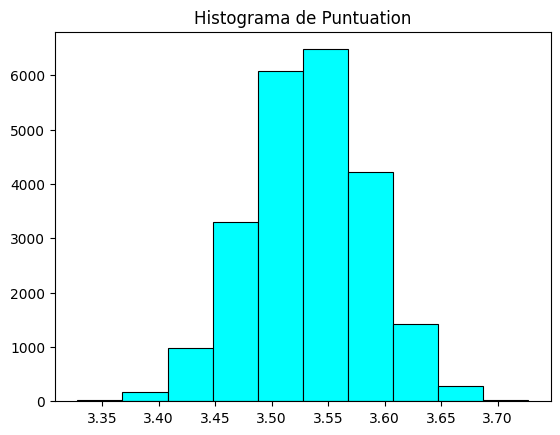

In [73]:
plt.title('Histograma de Puntuation')
plt.hist (df_combinado['punctuation'], edgecolor = 'black', color = 'aqua', linewidth = 0.8)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

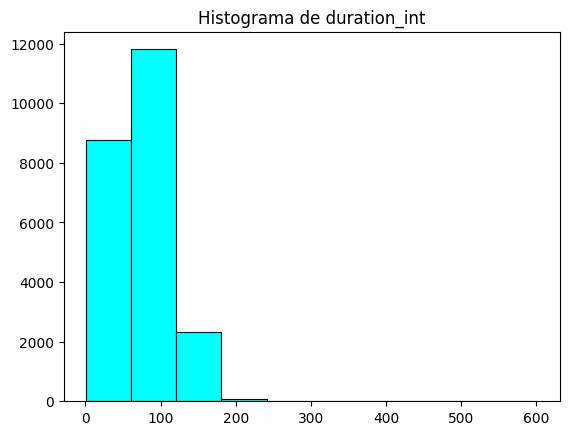

In [74]:
plt.title('Histograma de duration_int')
plt.hist (df_combinado['duration_int'], edgecolor = 'black', color = 'aqua', linewidth = 0.8)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

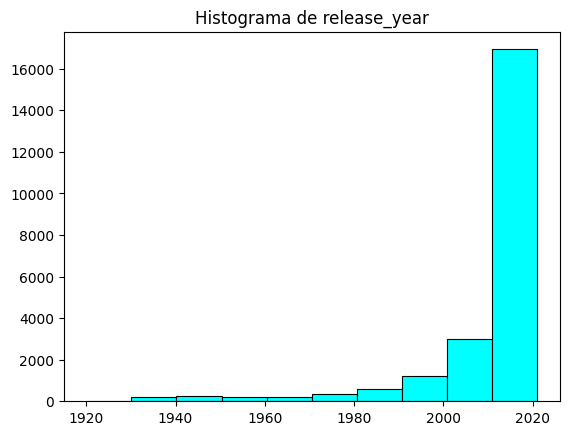

In [75]:
plt.title('Histograma de release_year')
plt.hist (df_combinado['release_year'], edgecolor = 'black', color = 'aqua', linewidth = 0.8)
plt.show

In [76]:
# Procedo a calcular la desviación estándar y la media para las columnas "puntuation", "duration_int" y "release_year"
Media = df_combinado[['punctuation', 'duration_int', 'release_year']].mean()
DesviaciónEstandar = df_combinado[['punctuation', 'duration_int', 'release_year']].std()

# Defino los límites superior e inferior
LimiteSuperior = Media + 3 * DesviaciónEstandar
LimiteInferior = Media - 3 * DesviaciónEstandar

# Se identifican los outliers para las columnas "puntuation", "duration_int" y "release_year"
outlier = df_combinado[(df_combinado['punctuation'] > LimiteSuperior['punctuation']) | (df_combinado['punctuation'] < LimiteInferior['punctuation']) | 
                                 (df_combinado['duration_int'] > LimiteSuperior['duration_int']) | (df_combinado['duration_int'] < LimiteInferior['duration_int']) |
                                 (df_combinado['release_year'] > LimiteSuperior['release_year']) | (df_combinado['release_year'] < LimiteInferior['release_year'])]


In [77]:
outlier.describe()

,punctuation,release_year,duration_int
count,871.000000,871.000000,871.000000
mean,3.528483,1954.810563,88.947187
std,0.067569,23.283849,88.466252
min,3.328247,1920.000000,1.000000
25%,3.490929,1940.000000,57.000000
50%,3.529619,1950.000000,77.000000
75%,3.567258,1959.000000,99.000000
max,3.727122,2021.000000,601.000000


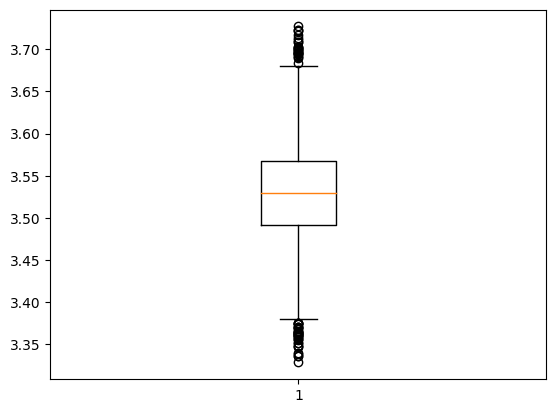

In [78]:
#Para hacer más intuitivo la visualización de outliers en este caso se realiza un boxplot
plt.boxplot(outlier ['punctuation'], vert=True, showfliers=True)
plt.show()


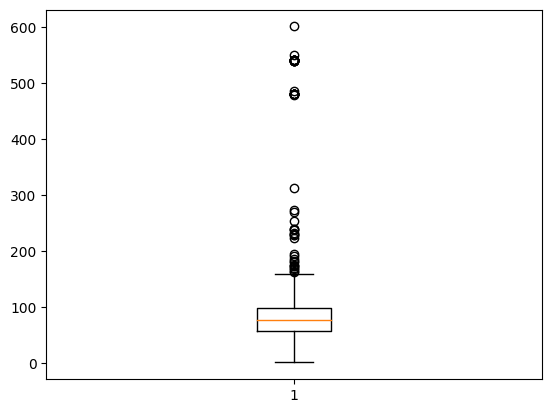

In [79]:
plt.boxplot(outlier ['duration_int'], vert=True, showfliers=True)
plt.show()

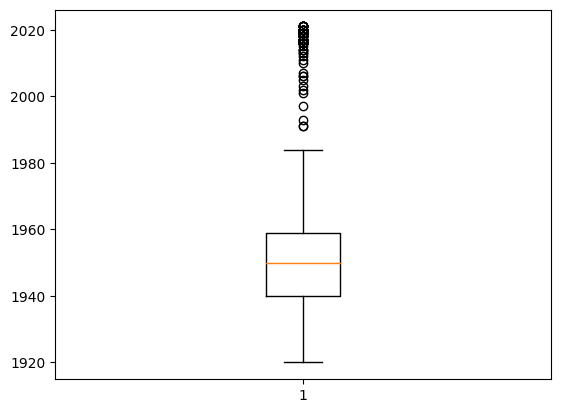

In [80]:
plt.boxplot(outlier ['release_year'], vert=True, showfliers=True)
plt.show()